# Training and Evaluation: Monitoring Learning Curves, Rewards, and Stability

## 📚 Learning Objectives

By completing this notebook, you will:
- Monitor learning curves during Deep RL training
- Track rewards and evaluate model performance
- Assess training stability
- Visualize training progress
- Identify convergence and performance issues

## 🔗 Prerequisites

- ✅ Understanding of Deep RL algorithms (DQN, Actor-Critic)
- ✅ Understanding of training loops
- ✅ Python knowledge (matplotlib, numpy)
- ✅ Experience with OpenAI Gym

---

## Official Structure Reference

This notebook covers practical activities from **Course 09, Unit 3**:
- Training and evaluation: monitoring learning curves, rewards, and stability to evaluate model performance
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 3 Practical Content

---

## Introduction

**Monitoring and evaluation** are crucial for Deep RL training. Learning curves, reward tracking, and stability metrics help assess training progress and identify issues early.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import gym

print("✅ Libraries imported!")
print("\nTraining and Evaluation: Monitoring Learning Curves")
print("=" * 60)

✅ Libraries imported!

Training and Evaluation: Monitoring Learning Curves


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


## Part 1: Monitoring Learning Curves


Part 1: Monitoring Learning Curves

Training Statistics:
  Total episodes: 200
  Average reward (final 50 episodes): 107.89
  Best episode reward: 125.45
  Average episode length: 79.78


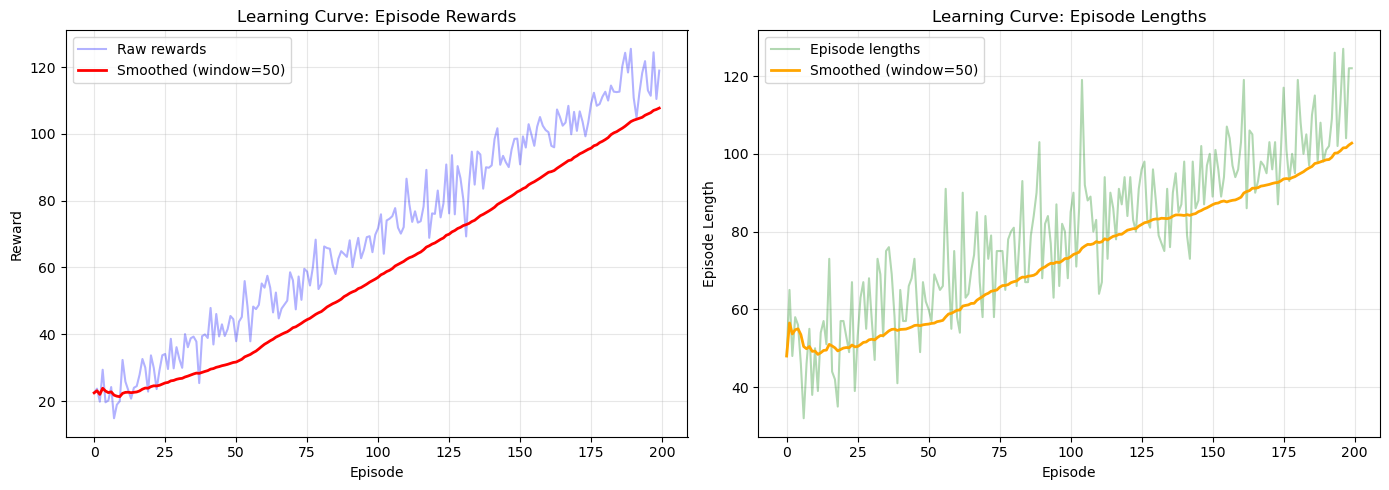


✅ Learning curves monitored!


In [2]:
print("=" * 60)
print("Part 1: Monitoring Learning Curves")
print("=" * 60)

class TrainingMonitor:
    """Monitor training progress for Deep RL."""
    
    def __init__(self, window_size=100):
        self.episode_rewards = []
        self.episode_lengths = []
        self.window_size = window_size
        self.reward_window = deque(maxlen=window_size)
    
    def record_episode(self, reward, length):
        """Record an episode's results."""
        self.episode_rewards.append(reward)
        self.episode_lengths.append(length)
        self.reward_window.append(reward)
    
    def get_average_reward(self):
        """Get average reward over window."""
        return np.mean(self.reward_window) if self.reward_window else 0.0
    
    def plot_learning_curve(self):
        """Plot learning curves."""
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot 1: Episode Rewards
        axes[0].plot(self.episode_rewards, alpha=0.3, label='Raw rewards', color='blue')
        if len(self.episode_rewards) >= self.window_size:
            smoothed = [np.mean(self.episode_rewards[max(0, i-self.window_size):i+1]) 
                       for i in range(len(self.episode_rewards))]
            axes[0].plot(smoothed, label=f'Smoothed (window={self.window_size})', 
                        color='red', linewidth=2)
        axes[0].set_xlabel('Episode')
        axes[0].set_ylabel('Reward')
        axes[0].set_title('Learning Curve: Episode Rewards')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Plot 2: Episode Lengths
        axes[1].plot(self.episode_lengths, alpha=0.3, label='Episode lengths', color='green')
        if len(self.episode_lengths) >= self.window_size:
            smoothed_lengths = [np.mean(self.episode_lengths[max(0, i-self.window_size):i+1]) 
                               for i in range(len(self.episode_lengths))]
            axes[1].plot(smoothed_lengths, label=f'Smoothed (window={self.window_size})', 
                        color='orange', linewidth=2)
        axes[1].set_xlabel('Episode')
        axes[1].set_ylabel('Episode Length')
        axes[1].set_title('Learning Curve: Episode Lengths')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Simulate training data
monitor = TrainingMonitor(window_size=50)

# Simulate training progress (improving over time)
np.random.seed(42)
for episode in range(200):
    # Simulate improving performance
    base_reward = 20 + episode * 0.5 + np.random.normal(0, 5)
    reward = max(0, base_reward)
    length = int(50 + episode * 0.3 + np.random.normal(0, 10))
    length = max(1, length)
    monitor.record_episode(reward, length)

print(f"\nTraining Statistics:")
print(f"  Total episodes: {len(monitor.episode_rewards)}")
print(f"  Average reward (final 50 episodes): {monitor.get_average_reward():.2f}")
print(f"  Best episode reward: {max(monitor.episode_rewards):.2f}")
print(f"  Average episode length: {np.mean(monitor.episode_lengths):.2f}")

monitor.plot_learning_curve()

print("\n✅ Learning curves monitored!")

## Part 2: Evaluating Stability



Part 2: Evaluating Stability

Stability Metrics:
  average_std: 15.4275
  max_std: 15.8568
  overall_variance: 887.2856
  overall_std: 29.7873
  early_mean: 44.1722
  late_mean: 95.3912
  improvement: 51.2191
  early_std: 15.1298
  late_std: 15.2958
  stability_improvement: -0.1660


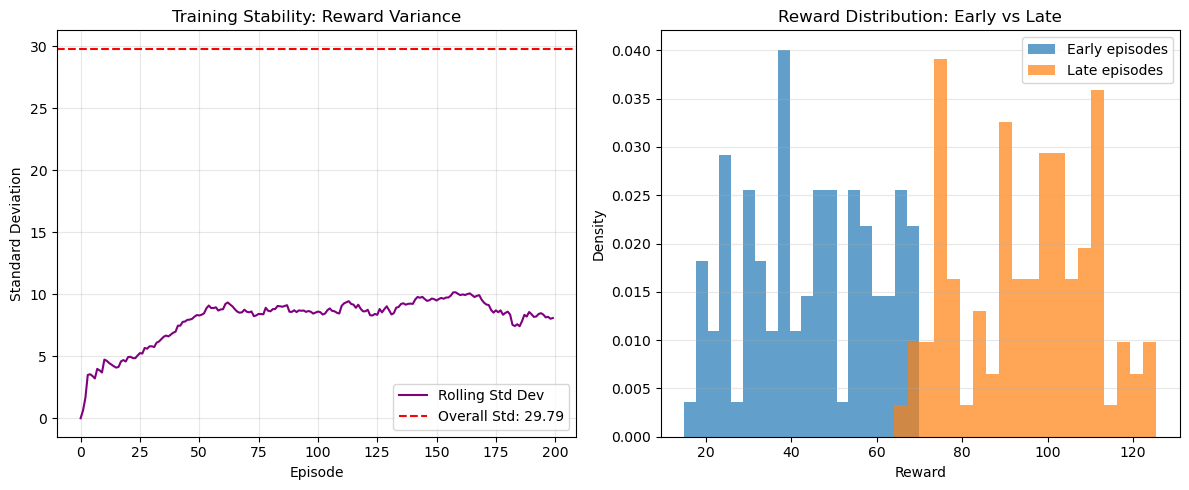


✅ Stability evaluated!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Evaluating Stability")
print("=" * 60)

def evaluate_stability(rewards, window_size=100):
    """Evaluate training stability metrics."""
    metrics = {}
    
    # Calculate standard deviation over windows
    if len(rewards) >= window_size:
        windows = [rewards[i:i+window_size] for i in range(0, len(rewards)-window_size+1, window_size//2)]
        stds = [np.std(window) for window in windows]
        metrics['average_std'] = np.mean(stds)
        metrics['max_std'] = np.max(stds)
    
    # Calculate reward variance
    metrics['overall_variance'] = np.var(rewards)
    metrics['overall_std'] = np.std(rewards)
    
    # Check for convergence (stability in later episodes)
    if len(rewards) >= 2 * window_size:
        early_rewards = rewards[:window_size]
        late_rewards = rewards[-window_size:]
        metrics['early_mean'] = np.mean(early_rewards)
        metrics['late_mean'] = np.mean(late_rewards)
        metrics['improvement'] = metrics['late_mean'] - metrics['early_mean']
        metrics['early_std'] = np.std(early_rewards)
        metrics['late_std'] = np.std(late_rewards)
        metrics['stability_improvement'] = metrics['early_std'] - metrics['late_std']
    
    return metrics

stability_metrics = evaluate_stability(monitor.episode_rewards)

print("\nStability Metrics:")
for key, value in stability_metrics.items():
    print(f"  {key}: {value:.4f}")

# Visualize stability
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
if len(monitor.episode_rewards) >= 100:
    window_std = [np.std(monitor.episode_rewards[max(0, i-50):i+1]) 
                  for i in range(len(monitor.episode_rewards))]
    plt.plot(window_std, label='Rolling Std Dev', color='purple')
    plt.axhline(y=stability_metrics.get('overall_std', 0), color='r', 
               linestyle='--', label=f'Overall Std: {stability_metrics.get("overall_std", 0):.2f}')
    plt.xlabel('Episode')
    plt.ylabel('Standard Deviation')
    plt.title('Training Stability: Reward Variance')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
if len(monitor.episode_rewards) >= 200:
    early = monitor.episode_rewards[:100]
    late = monitor.episode_rewards[-100:]
    plt.hist(early, bins=20, alpha=0.7, label='Early episodes', density=True)
    plt.hist(late, bins=20, alpha=0.7, label='Late episodes', density=True)
    plt.xlabel('Reward')
    plt.ylabel('Density')
    plt.title('Reward Distribution: Early vs Late')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Stability evaluated!")

## Summary

### Key Metrics:
1. **Learning Curves**: Episode rewards and lengths over time
2. **Smoothed Curves**: Moving averages to reduce noise
3. **Stability Metrics**: Variance, standard deviation, convergence
4. **Performance Tracking**: Best rewards, average performance

### Best Practices:
- Monitor rewards, episode lengths, and loss (if applicable)
- Use smoothing to identify trends
- Track stability metrics (variance reduction over time)
- Compare early vs late performance
- Set up early stopping based on convergence

### Evaluation Checklist:
- ✅ Learning curves showing improvement
- ✅ Stable/declining variance over time
- ✅ Convergence to good performance
- ✅ Consistent behavior in late training

### Applications:
- All Deep RL algorithms (DQN, A2C, PPO, etc.)
- Hyperparameter tuning
- Algorithm comparison
- Debugging training issues

**Reference:** Course 09, Unit 3: "Deep Reinforcement Learning" - Training and evaluation practical contenttt